## Assignment 12
#### 1) Finalize figures(Bijan

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

length, width = cleaned.shape
print length
print width

36036
4


### Make a higher definition graph

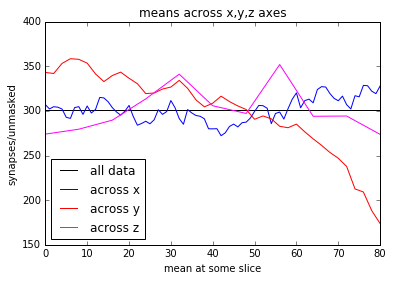

In [2]:
import math

divisionsx = np.unique(cleaned[:,0])
meanx = np.zeros((2,len(divisionsx)))

divisionsy = np.unique(cleaned[:,1])
meany = np.zeros((2,len(divisionsy)))

divisionsz = np.unique(cleaned[:,2])
meanz = np.zeros((2,len(divisionsz)))

maxlen = np.amax([len(divisionsx),len(divisionsy),len(divisionsz)])
xstep = np.divide(maxlen,len(divisionsx))
ystep = 2
zstep = 8

counter = 0
for d in divisionsx:
    slicex = cleaned[cleaned[:,0] == d]
    meanx[0,counter] = (counter)*xstep
    meanx[1,counter] = np.mean(slicex[:,3])
    counter += 1
    
counter = 0
for d in divisionsy:
    slicey = cleaned[cleaned[:,1] == d]
    meany[0,counter] = (counter)*ystep
    meany[1,counter] = np.mean(slicey[:,3])
    counter += 1
    
counter = 0
for d in divisionsz:
    slicez = cleaned[cleaned[:,2] == d]
    meanz[0,counter] = (counter)*zstep
    meanz[1,counter] = np.mean(slicez[:,3])
    counter += 1
    
#plot it
allmean = [301] * maxlen
fig,ax = plt.subplots()
ax.set_title('means across x,y,z axes')
#ax.set_xticks(np.arange(0,11,3))
#ax.set_yticks(np.arange(200,380,40))
ax.set_xlabel('mean at some slice')
ax.set_ylabel('synapses/unmasked')
ax.plot(allmean,label='all data',color='black')
ax.plot(meanx[0,:],meanx[1,:],label='across x',color='blue')
ax.plot(meany[0,:],meany[1,:],label='across y',color='red')
ax.plot(meanz[0,:],meanz[1,:],label='across z',color='magenta')
legend = ax.legend(loc='lower left')

#### It seems clear that the data changes across y. Let's look at the magnitude of these changes.

[ -1.151  11.256   5.299  -0.731  -4.266 -12.13   -8.529   6.754   3.87
  -6.869  -6.101 -11.096   0.626   4.467   2.237   7.492  -8.962 -12.884
  -7.842   4.103   7.88   -6.088  -4.872  -4.008 -10.934   3.753  -3.197
  -8.365  -1.651   4.076  -8.661  -7.858  -7.266  -7.974  -6.467  -9.197
 -25.165  -3.464 -20.893 -14.473]


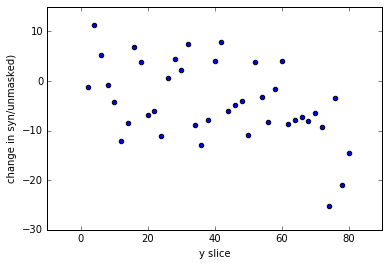

In [19]:
mean = meany[1,:]
mean1 = mean[:-1]
mean2 = mean[1:]
meandiff = mean2 - mean1
print meandiff
fig,ax = plt.subplots()
ax.scatter(meany[0,1:],meandiff)
ax.set_xlabel('y slice')
ax.set_ylabel('change in syn/unmasked)')
#ax.set_xticks(np.arange(0,40,10))
ax.set_yticks(np.arange(-30,15,10))